In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [138]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 15.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [38]:
PATH_songs_list = '/Users/villela/Documents/00_Noble_Desktop/ML project/get_all_chords.csv'
PATH_chords_table = '/Users/villela/Documents/00_Noble_Desktop/ML project/chord_relathipship_table.csv'

In [39]:
df_songs = pd.read_csv(PATH_songs_list)
df_chords = pd.read_csv(PATH_chords_table)

In [40]:
df_songs.head()

,Song,Main composer,Singer,Album - Release Date,key,chords,Key (manual)
0,I Saw Her Standing There,McCartney,McCartney,Please Please Me - 22 March 1963,E,"['E', 'A7', 'B7', 'E7', 'A', 'C', 'B']",I Saw Her Standing There - E major
1,Misery,Lennon/McCartney,Lennon/McCartney,Please Please Me - 22 March 1963,E,"['F', 'G', 'C', 'Am', 'G7']",Misery - E major
2,Anna (Go to Him),Alexander,Lennon,Please Please Me - 22 March 1963,E,"['D', 'Bm', 'Em', 'A7', 'G', 'E7', 'Gm']",Anna (Go to Him) - C major
3,Chains,Goffin/King,Harrison,Please Please Me - 22 March 1963,E,"['A', 'D9', 'E9', 'E', 'A7', 'E7', 'D', 'Dm']",Chains - E major
4,Boys,Dixon/Farrell,Starr,Please Please Me - 22 March 1963,E,"['A', 'D', 'E', 'E7']",Boys - E major


In [41]:
df_songs.columns

Index(['Song', 'Main composer', 'Singer', 'Album - Release Date', 'key',
       'chords', 'Key (manual)'],
      dtype='object')

In [42]:
df_songs['Album'] = [df_songs['Album - Release Date'].str.split('-')[i][0] for i in range(len(df_songs))]
df_songs['Release date'] = [df_songs['Album - Release Date'].str.split('-')[i][1] for i in range(len(df_songs))]
df_songs['Key'] = [df_songs['Key (manual)'].str.split('-')[i][1].strip() for i in range(len(df_songs))]
df_songs['Chords'] = [df_songs['chords'][i].replace("'","").replace(" ","").strip('[]').split(',') for i in range(len(df_songs))]

In [43]:
df_songs.head()

,Song,Main composer,Singer,Album - Release Date,key,chords,Key (manual),Album,Release date,Key,Chords
0,I Saw Her Standing There,McCartney,McCartney,Please Please Me - 22 March 1963,E,"['E', 'A7', 'B7', 'E7', 'A', 'C', 'B']",I Saw Her Standing There - E major,Please Please Me,22 March 1963,E major,"[E, A7, B7, E7, A, C, B]"
1,Misery,Lennon/McCartney,Lennon/McCartney,Please Please Me - 22 March 1963,E,"['F', 'G', 'C', 'Am', 'G7']",Misery - E major,Please Please Me,22 March 1963,E major,"[F, G, C, Am, G7]"
2,Anna (Go to Him),Alexander,Lennon,Please Please Me - 22 March 1963,E,"['D', 'Bm', 'Em', 'A7', 'G', 'E7', 'Gm']",Anna (Go to Him) - C major,Please Please Me,22 March 1963,C major,"[D, Bm, Em, A7, G, E7, Gm]"
3,Chains,Goffin/King,Harrison,Please Please Me - 22 March 1963,E,"['A', 'D9', 'E9', 'E', 'A7', 'E7', 'D', 'Dm']",Chains - E major,Please Please Me,22 March 1963,E major,"[A, D9, E9, E, A7, E7, D, Dm]"
4,Boys,Dixon/Farrell,Starr,Please Please Me - 22 March 1963,E,"['A', 'D', 'E', 'E7']",Boys - E major,Please Please Me,22 March 1963,E major,"[A, D, E, E7]"


In [44]:
df_songs.drop(['Album - Release Date', 'Key (manual)', 'key', 'chords'], axis=1, inplace=True)

In [45]:
df_songs['Key'].value_counts()

E major     55
A major     45
G major     34
C major     22
D major     18
F major     10
A minor      8
Eb major     5
Bb major     3
E minor      3
B major      2
D minor      2
B minor      1
C minor      1
G minor      1
C# minor     1
F# major     1
Name: Key, dtype: int64

In [46]:
df_songs['Release Year'] = [df_songs['Release date'][i][-4:] for i in range(len(df_songs))]

In [47]:
df_songs.head()

,Song,Main composer,Singer,Album,Release date,Key,Chords,Release Year
0,I Saw Her Standing There,McCartney,McCartney,Please Please Me,22 March 1963,E major,"[E, A7, B7, E7, A, C, B]",1963
1,Misery,Lennon/McCartney,Lennon/McCartney,Please Please Me,22 March 1963,E major,"[F, G, C, Am, G7]",1963
2,Anna (Go to Him),Alexander,Lennon,Please Please Me,22 March 1963,C major,"[D, Bm, Em, A7, G, E7, Gm]",1963
3,Chains,Goffin/King,Harrison,Please Please Me,22 March 1963,E major,"[A, D9, E9, E, A7, E7, D, Dm]",1963
4,Boys,Dixon/Farrell,Starr,Please Please Me,22 March 1963,E major,"[A, D, E, E7]",1963


In [48]:
df_songs.drop_duplicates(subset=['Song'], inplace=True)

In [49]:
df_songs.index = df_songs['Song']
df_songs.drop('Song', axis=1, inplace=True)
df_songs.head()

,Main composer,Singer,Album,Release date,Key,Chords,Release Year
Song,,,,,,,
I Saw Her Standing There,McCartney,McCartney,Please Please Me,22 March 1963,E major,"[E, A7, B7, E7, A, C, B]",1963
Misery,Lennon/McCartney,Lennon/McCartney,Please Please Me,22 March 1963,E major,"[F, G, C, Am, G7]",1963
Anna (Go to Him),Alexander,Lennon,Please Please Me,22 March 1963,C major,"[D, Bm, Em, A7, G, E7, Gm]",1963
Chains,Goffin/King,Harrison,Please Please Me,22 March 1963,E major,"[A, D9, E9, E, A7, E7, D, Dm]",1963
Boys,Dixon/Farrell,Starr,Please Please Me,22 March 1963,E major,"[A, D, E, E7]",1963


In [50]:
################################################################################################

In [51]:
df_chords.head()

,Key,Key (manual),I,ii,iii,IV,V,vi*,vii
0,C,C major,C,Dm,Em,F,G,Am,Bdim
1,C#,C# major,C#,D#m,E#m,F#,G#,A#m,B#dim
2,Db,Db major,Db,Ebm,Fm,Gb,Ab,Bbm,Cdim
3,D,D major,D,Em,F#m,G,A,Bm,C#dim
4,Eb,Eb major,Eb,Fm,Gm,Ab,Bb,Cm,Ddim


In [52]:
df_chords.index = df_chords['Key (manual)']
df_chords.drop(['Key', 'Key (manual)'], axis=1, inplace=True)
df_chords.head(10)

,I,ii,iii,IV,V,vi*,vii
Key (manual),,,,,,,
C major,C,Dm,Em,F,G,Am,Bdim
C# major,C#,D#m,E#m,F#,G#,A#m,B#dim
Db major,Db,Ebm,Fm,Gb,Ab,Bbm,Cdim
D major,D,Em,F#m,G,A,Bm,C#dim
Eb major,Eb,Fm,Gm,Ab,Bb,Cm,Ddim
E major,E,F#m,G#m,A,B,C#m,D#dim
F major,F,Gm,Am,Bb,C,Dm,Edim
F# major,F#,G#m,A#m,B,C#,D#m,E#dim
Gb major,Gb,Abm,Bbm,Cb,Db,Ebm,Fdim


In [53]:
df_chords.loc[df_songs['Key'][0]]

I          E
ii       F#m
iii      G#m
IV         A
V          B
vi*      C#m
vii    D#dim
Name: E major, dtype: object

In [54]:
df_chords.loc[df_songs['Key'][0]].values

array(['E', 'F#m', 'G#m', 'A', 'B', 'C#m', 'D#dim'], dtype=object)

In [55]:
for i in range(7):
    print(len(df_chords.loc[df_songs['Key'][0]].values[i]))

1
3
3
1
1
3
5


In [56]:
df_songs['Chords'][0]

['E', 'A7', 'B7', 'E7', 'A', 'C', 'B']

In [57]:
type(df_songs['Chords'][0])

list

In [58]:
len(df_songs['Chords'][0])

7

In [59]:
diatonic = 0
chromatic = 0
for chord in df_songs['Chords'][0]:
    print(f"Chord: {chord}")
    for i in range(7):
        print(f"position {i+1}: {df_chords.loc[df_songs['Key'][0]].values[i]}")
        print(f"len: {len(df_chords.loc[df_songs['Key'][0]].values[i])}")
        print(f"left of chord: {chord[0:len(df_chords.loc[df_songs['Key'][0]].values[i])]}")
        print(f"right of chord: {chord[len(df_chords.loc[df_songs['Key'][0]].values[i]):]}")
        print("")


Chord: E
position 1: E
len: 1
left of chord: E
right of chord: 

position 2: F#m
len: 3
left of chord: E
right of chord: 

position 3: G#m
len: 3
left of chord: E
right of chord: 

position 4: A
len: 1
left of chord: E
right of chord: 

position 5: B
len: 1
left of chord: E
right of chord: 

position 6: C#m
len: 3
left of chord: E
right of chord: 

position 7: D#dim
len: 5
left of chord: E
right of chord: 

Chord: A7
position 1: E
len: 1
left of chord: A
right of chord: 7

position 2: F#m
len: 3
left of chord: A7
right of chord: 

position 3: G#m
len: 3
left of chord: A7
right of chord: 

position 4: A
len: 1
left of chord: A
right of chord: 7

position 5: B
len: 1
left of chord: A
right of chord: 7

position 6: C#m
len: 3
left of chord: A7
right of chord: 

position 7: D#dim
len: 5
left of chord: A7
right of chord: 

Chord: B7
position 1: E
len: 1
left of chord: B
right of chord: 7

position 2: F#m
len: 3
left of chord: B7
right of chord: 

position 3: G#m
len: 3
left of chord: B7
rig

In [60]:
def break_chords_down(song_index):
    diatonic = set()
    chromatic = set()
    complexions = set()
    for chord in df_songs['Chords'][song_index]:
        for i in range(7):
            position_chord = df_chords.loc[df_songs['Key'][song_index]].values[i]
            position_chord_len = len(df_chords.loc[df_songs['Key'][song_index]].values[i])
            left_of_chord = chord[0:position_chord_len]
            right_of_chord = chord[position_chord_len:]
            if position_chord == left_of_chord:
                diatonic.add(left_of_chord)
                if right_of_chord != "": complexions.add(right_of_chord)
                break
            elif i == 6: chromatic.add(chord)
    return diatonic, chromatic, complexions

In [61]:
data = [break_chords_down(i) for i in range(len(df_songs))]
diatonic_chords, chromatic_chords, complexions = zip(*data)
df_songs['Diatonic Chords'] = diatonic_chords
df_songs['Chromatic Chords'] = chromatic_chords
df_songs['Complexions'] = complexions
df_songs

,Main composer,Singer,Album,Release date,Key,Chords,Release Year,Diatonic Chords,Chromatic Chords,Complexions
Song,,,,,,,,,,
I Saw Her Standing There,McCartney,McCartney,Please Please Me,22 March 1963,E major,"[E, A7, B7, E7, A, C, B]",1963,"{E, A, B}",{C},{7}
Misery,Lennon/McCartney,Lennon/McCartney,Please Please Me,22 March 1963,E major,"[F, G, C, Am, G7]",1963,{A},"{G, C, G7, F}",{m}
Anna (Go to Him),Alexander,Lennon,Please Please Me,22 March 1963,C major,"[D, Bm, Em, A7, G, E7, Gm]",1963,"{Em, G}","{D, A7, Bm, E7}",{m}
Chains,Goffin/King,Harrison,Please Please Me,22 March 1963,E major,"[A, D9, E9, E, A7, E7, D, Dm]",1963,"{E, A}","{D9, D, Dm}","{7, 9}"
Boys,Dixon/Farrell,Starr,Please Please Me,22 March 1963,E major,"[A, D, E, E7]",1963,"{E, A}",{D},{7}
...,...,...,...,...,...,...,...,...,...,...
I Feel Fine,Lennon,Lennon,I Feel Fine,27 November 1964,D major,"[D, C, G, Bm, D7, Am]",1964,"{D, A, Bm, G}",{C},"{7, m}"
Bad Boy,Williams,Lennon,Bad Boy,10 December 1965,D major,"[C7, F7, G7]",1965,{G},"{C7, F7}",{7}
Day Tripper,Lennon,Lennon/McCartney,Day Tripper,3 December 1965,E major,"[E7, A7, F#7, A, G#, C#, B, B7, A/B]",1965,"{E, A, B}","{C#, F#7, G#}","{/B, 7}"


In [62]:
df_songs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211 entries, I Saw Her Standing There to I Want to Hold Your Hand
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Main composer     211 non-null    object
 1   Singer            210 non-null    object
 2   Album             211 non-null    object
 3   Release date      211 non-null    object
 4   Key               211 non-null    object
 5   Chords            211 non-null    object
 6   Release Year      211 non-null    object
 7   Diatonic Chords   211 non-null    object
 8   Chromatic Chords  211 non-null    object
 9   Complexions       211 non-null    object
dtypes: object(10)
memory usage: 18.1+ KB


In [63]:
df_songs['Main composer'].value_counts()

Lennon                                    73
McCartney                                 70
Harrison                                  22
Lennon/McCartney                          18
Williams                                   3
Perkins                                    3
Starr                                      2
Berry                                      2
Bradford/Gordy                             1
Trad.                                      1
Lennon/McCartney/Harrison/Starr            1
Morrison/Russel                            1
Holly                                      1
Leiber/Stoller/Penniman                    1
Johnson                                    1
Robinson                                   1
Drapkin                                    1
Holland/Bateman/Garrett/Dobbins/Gorman     1
Wilson                                     1
Medley/Russel                              1
Scott/Marlow                               1
David/Williams/Bacharach                   1
Dixon/Farr

In [64]:
values_to_filter = ['Williams',
    'Perkins',
    'Berry',
    'Bradford/Gordy',
    'Trad.',
    'Morrison/Russel',
    'Holly',
    'Leiber/Stoller/Penniman',
    'Johnson',
    'Robinson',
    'Drapkin',
    'Holland/Bateman/Garrett/Dobbins/Gorman',
    'Wilson',
    'Medley/Russel',
    'Scott/Marlow',
    'David/Williams/Bacharach',
    'Dixon/Farrell',
    'Goffin/King',
    'Alexander',
    'Johnson/Penniman/Blackwell']
index_to_drop = df_songs[df_songs['Main composer'].isin(values_to_filter)].index
df_songs.drop(index_to_drop, inplace=True)

In [65]:
df_songs.columns

Index(['Main composer', 'Singer', 'Album', 'Release date', 'Key', 'Chords',
       'Release Year', 'Diatonic Chords', 'Chromatic Chords', 'Complexions'],
      dtype='object')

In [66]:
df_songs['Release Year'] = df_songs['Release Year'].astype(int)

In [67]:
'''
Get dummies with composer
Get qty of diatonic, chromatic, complexions
Get regressions libraries and matplotlib
Plot charts
    by composer, that one that plots everything at once
    by year
    by year by composer
Train Test Split, Score: find composer based on other elements
    check both linear and nearest neighbors
'''

'\nGet dummies with composer\nGet qty of diatonic, chromatic, complexions\nGet regressions libraries and matplotlib\nPlot charts\n    by composer, that one that plots everything at once\n    by year\n    by year by composer\nTrain Test Split, Score: find composer based on other elements\n    check both linear and nearest neighbors\n'

In [113]:
dummies = pd.get_dummies(df_songs['Main composer'], prefix=None)
df = pd.concat([df_songs, dummies], axis=1)
df.head()

,Main composer,Singer,Album,Release date,Key,Chords,Release Year,Diatonic Chords,Chromatic Chords,Complexions,Harrison,Lennon,Lennon/McCartney,Lennon/McCartney/Harrison/Starr,McCartney,Starr
Song,,,,,,,,,,,,,,,,
I Saw Her Standing There,McCartney,McCartney,Please Please Me,22 March 1963,E major,"[E, A7, B7, E7, A, C, B]",1963,"{E, A, B}",{C},{7},0,0,0,0,1,0
Misery,Lennon/McCartney,Lennon/McCartney,Please Please Me,22 March 1963,E major,"[F, G, C, Am, G7]",1963,{A},"{G, C, G7, F}",{m},0,0,1,0,0,0
Ask Me Why,Lennon,Lennon,Please Please Me,22 March 1963,E major,"[A, E, G#m, F#m, G#, C#m, Am, F#, B, E+5]",1963,"{A, G#m, E, F#m, C#m, B}","{G#, F#}","{+5, m}",0,1,0,0,0,0
Please Please Me,Lennon,Lennon/McCartney,Please Please Me,22 March 1963,E major,"[E7, A7, B7, E, C7, F, G, C, Am, D, Bm, Em, Gm...",1963,"{A, G#m, E, F#m, C#m, B}","{D9, Gdim, C, F, Dm, C/G, G#, G, D, F#, Gm, C7...","{7, 9, b, m, +5}",0,1,0,0,0,0
Love Me Do,McCartney,Lennon/McCartney,Please Please Me,22 March 1963,G major,"[G, C, G7, D]",1963,"{D, C, G}",{},{7},0,0,0,0,1,0


In [114]:
df['Diatonic Qty'] = [len(df['Diatonic Chords'][i]) for i in range(len(df))]
df['Chromatic Qty'] = [len(df['Chromatic Chords'][i]) for i in range(len(df))]
df['Complexions Qty'] = [len(df['Complexions'][i]) for i in range(len(df))]
df.head()

,Main composer,Singer,Album,Release date,Key,Chords,Release Year,Diatonic Chords,Chromatic Chords,Complexions,Harrison,Lennon,Lennon/McCartney,Lennon/McCartney/Harrison/Starr,McCartney,Starr,Diatonic Qty,Chromatic Qty,Complexions Qty
Song,,,,,,,,,,,,,,,,,,,
I Saw Her Standing There,McCartney,McCartney,Please Please Me,22 March 1963,E major,"[E, A7, B7, E7, A, C, B]",1963,"{E, A, B}",{C},{7},0,0,0,0,1,0,3,1,1
Misery,Lennon/McCartney,Lennon/McCartney,Please Please Me,22 March 1963,E major,"[F, G, C, Am, G7]",1963,{A},"{G, C, G7, F}",{m},0,0,1,0,0,0,1,4,1
Ask Me Why,Lennon,Lennon,Please Please Me,22 March 1963,E major,"[A, E, G#m, F#m, G#, C#m, Am, F#, B, E+5]",1963,"{A, G#m, E, F#m, C#m, B}","{G#, F#}","{+5, m}",0,1,0,0,0,0,6,2,2
Please Please Me,Lennon,Lennon/McCartney,Please Please Me,22 March 1963,E major,"[E7, A7, B7, E, C7, F, G, C, Am, D, Bm, Em, Gm...",1963,"{A, G#m, E, F#m, C#m, B}","{D9, Gdim, C, F, Dm, C/G, G#, G, D, F#, Gm, C7...","{7, 9, b, m, +5}",0,1,0,0,0,0,6,13,5
Love Me Do,McCartney,Lennon/McCartney,Please Please Me,22 March 1963,G major,"[G, C, G7, D]",1963,"{D, C, G}",{},{7},0,0,0,0,1,0,3,0,1


In [116]:
df.head()

,Main composer,Singer,Album,Release date,Key,Chords,Release Year,Diatonic Chords,Chromatic Chords,Complexions,Harrison,Lennon,Lennon/McCartney,Lennon/McCartney/Harrison/Starr,McCartney,Starr,Diatonic Qty,Chromatic Qty,Complexions Qty
Song,,,,,,,,,,,,,,,,,,,
I Saw Her Standing There,McCartney,McCartney,Please Please Me,22 March 1963,E major,"[E, A7, B7, E7, A, C, B]",1963,"{E, A, B}",{C},{7},0,0,0,0,1,0,3,1,1
Misery,Lennon/McCartney,Lennon/McCartney,Please Please Me,22 March 1963,E major,"[F, G, C, Am, G7]",1963,{A},"{G, C, G7, F}",{m},0,0,1,0,0,0,1,4,1
Ask Me Why,Lennon,Lennon,Please Please Me,22 March 1963,E major,"[A, E, G#m, F#m, G#, C#m, Am, F#, B, E+5]",1963,"{A, G#m, E, F#m, C#m, B}","{G#, F#}","{+5, m}",0,1,0,0,0,0,6,2,2
Please Please Me,Lennon,Lennon/McCartney,Please Please Me,22 March 1963,E major,"[E7, A7, B7, E, C7, F, G, C, Am, D, Bm, Em, Gm...",1963,"{A, G#m, E, F#m, C#m, B}","{D9, Gdim, C, F, Dm, C/G, G#, G, D, F#, Gm, C7...","{7, 9, b, m, +5}",0,1,0,0,0,0,6,13,5
Love Me Do,McCartney,Lennon/McCartney,Please Please Me,22 March 1963,G major,"[G, C, G7, D]",1963,"{D, C, G}",{},{7},0,0,0,0,1,0,3,0,1


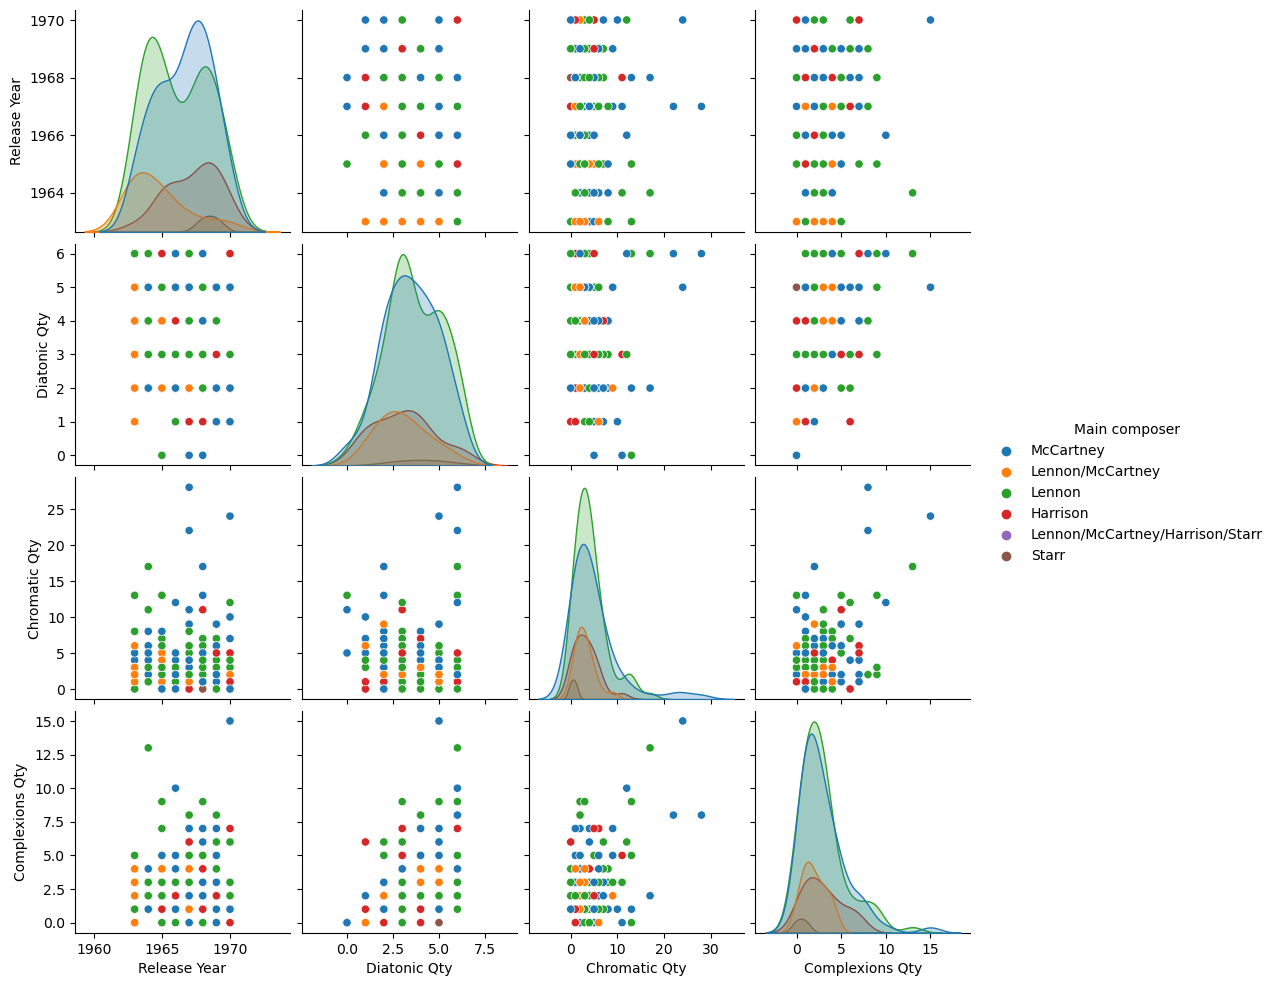

In [189]:
pairplot = sns.pairplot(data=df[['Main composer','Release Year', 'Diatonic Qty', 'Chromatic Qty', 'Complexions Qty']], hue='Main composer')
pairplot
# 'Harrison', 'Lennon', 'Lennon/McCartney','Lennon/McCartney/Harrison/Starr', 'McCartney', 'Starr',

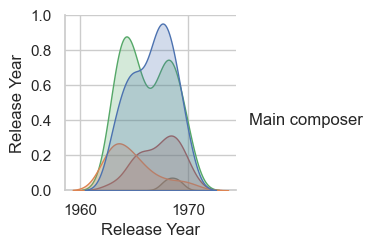

In [282]:
sns.pairplot(data=df[['Main composer','Release Year']], hue='Main composer')
# 'Harrison', 'Lennon', 'Lennon/McCartney','Lennon/McCartney/Harrison/Starr', 'McCartney', 'Starr',

/var/folders/j4/48d_zp914zjcvl7wg8l5qsqh0000gn/T/ipykernel_92185/2556797725.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=subset, x='Release Year', fill=True, alpha=0.5, label=composer)


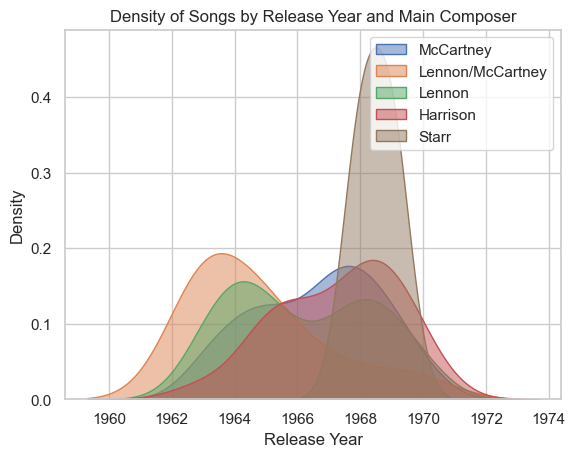

In [214]:
# Setting the style
sns.set(style="whitegrid")

# Plotting overlapping KDE plots for each composer
for composer in df['Main composer'].unique():
    subset = df[df['Main composer'] == composer]
    sns.kdeplot(data=subset, x='Release Year', fill=True, alpha=0.5, label=composer)

plt.title('Density of Songs by Release Year and Main Composer')
plt.xlabel('Release Year')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.show()


In [ ]:
'''
Lennon led during early-years
McCartney led during later years
Harrison didn't compose much at first, but increased gradually
'''

In [123]:
df[['Release Year', 'Diatonic Qty', 'Chromatic Qty', 'Complexions Qty']]

,Release Year,Diatonic Qty,Chromatic Qty,Complexions Qty
Song,,,,
I Saw Her Standing There,1963,3,1,1
Misery,1963,1,4,1
Ask Me Why,1963,6,2,2
Please Please Me,1963,6,13,5
Love Me Do,1963,3,0,1
...,...,...,...,...
We Can Work It Out,1965,4,3,4
I Feel Fine,1964,4,1,2
Day Tripper,1965,3,3,2


In [125]:
# Lennon/McCartney stopped collaborating
# Lennon had more songs in the beginning, then McCartney
# Harrison started later

# Try: pairplot by composer

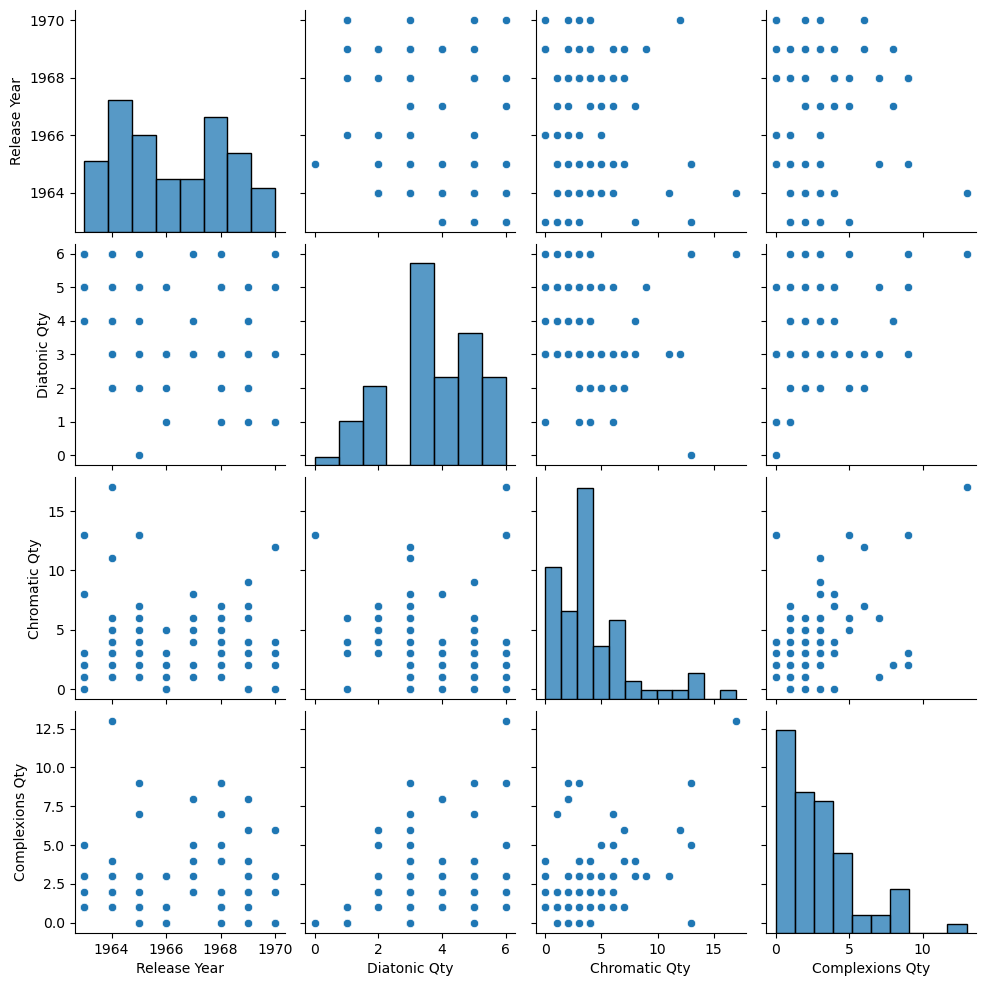

In [128]:
df_lennon = df[df['Main composer'] == 'Lennon']
sns.pairplot(data=df_lennon[['Main composer','Release Year', 'Diatonic Qty', 'Chromatic Qty', 'Complexions Qty']])

In [ ]:
'''
Lennon

Did he get simpler?
'''

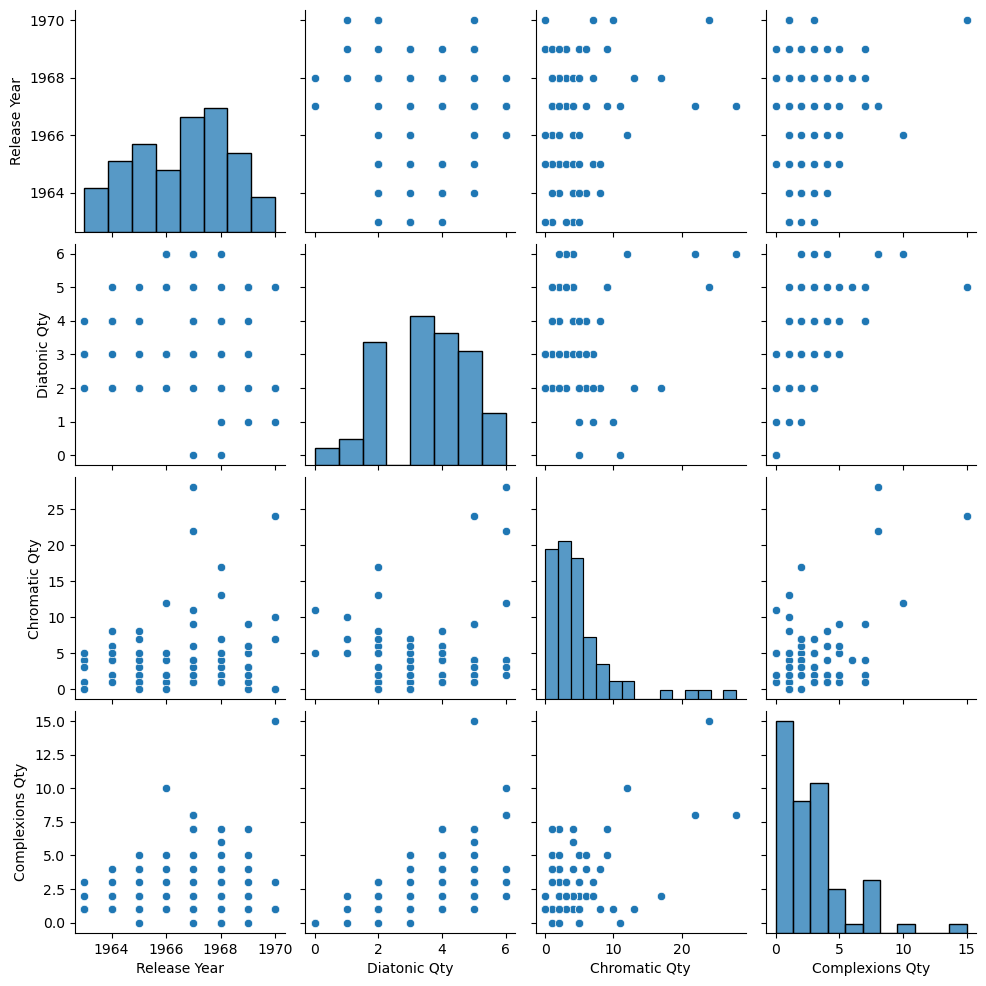

In [129]:
df_mccartney = df[df['Main composer'] == 'McCartney']
sns.pairplot(data=df_mccartney[['Main composer','Release Year', 'Diatonic Qty', 'Chromatic Qty', 'Complexions Qty']])

In [ ]:
'''
MCCARTNEY

Did he get more complex?
'''

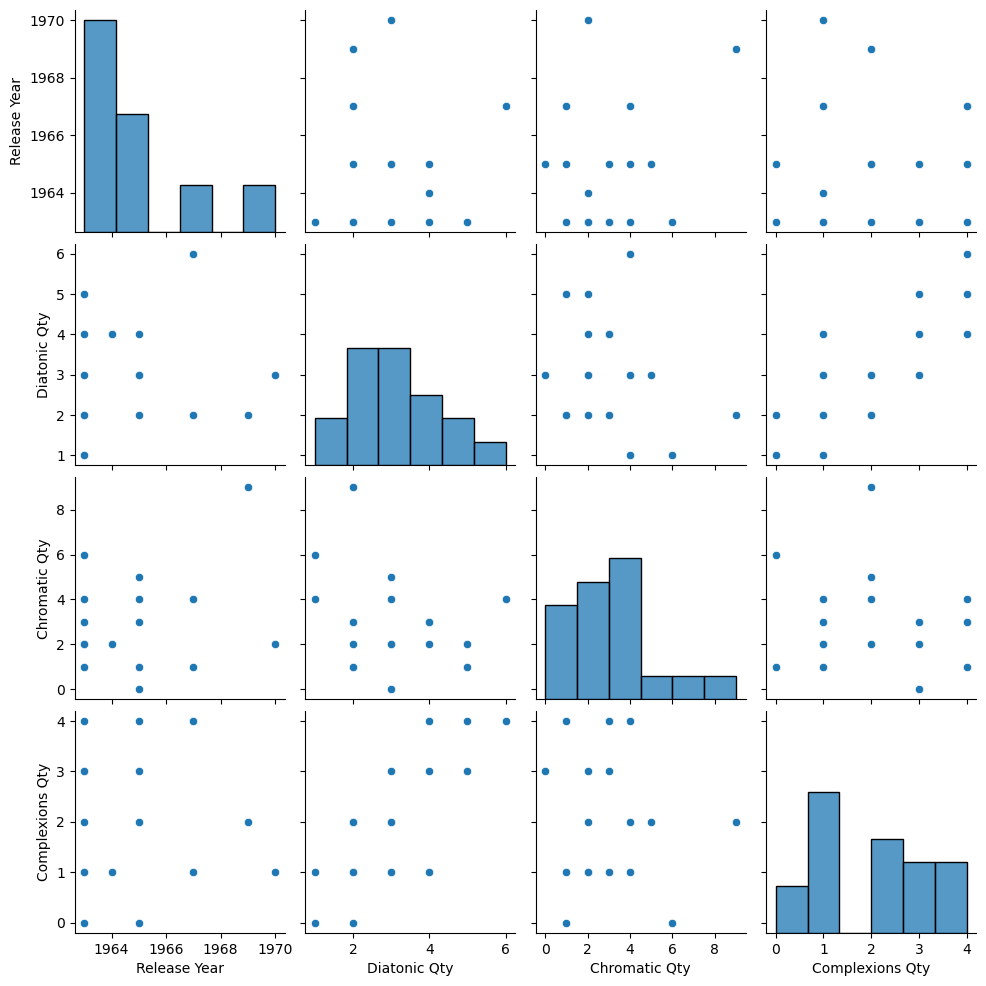

In [130]:
df_lennon_mccartney = df[df['Main composer'] == 'Lennon/McCartney']
sns.pairplot(data=df_lennon_mccartney[['Main composer','Release Year', 'Diatonic Qty', 'Chromatic Qty', 'Complexions Qty']])

In [ ]:
'''
LENNON/MCCARTNEY

Collaboration decreased?
'''

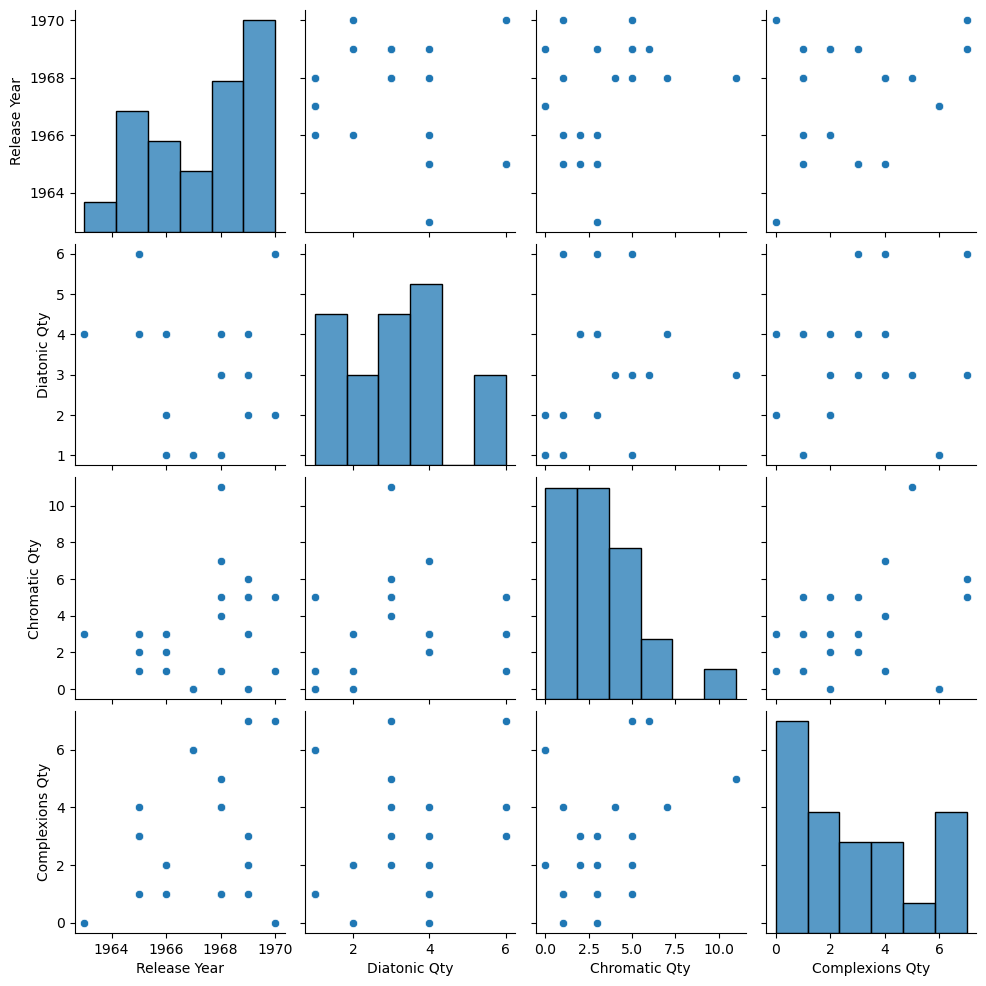

In [131]:
df_harrison = df[df['Main composer'] == 'Harrison']
sns.pairplot(data=df_harrison[['Main composer','Release Year', 'Diatonic Qty', 'Chromatic Qty', 'Complexions Qty']])

In [ ]:
'''
HARRISON

Complexity increased?
'''

In [132]:
df.columns

Index(['Main composer', 'Singer', 'Album', 'Release date', 'Key', 'Chords',
       'Release Year', 'Diatonic Chords', 'Chromatic Chords', 'Complexions',
       'Harrison', 'Lennon', 'Lennon/McCartney',
       'Lennon/McCartney/Harrison/Starr', 'McCartney', 'Starr', 'Diatonic Qty',
       'Chromatic Qty', 'Complexions Qty'],
      dtype='object')

In [133]:
df.head()

,Main composer,Singer,Album,Release date,Key,Chords,Release Year,Diatonic Chords,Chromatic Chords,Complexions,Harrison,Lennon,Lennon/McCartney,Lennon/McCartney/Harrison/Starr,McCartney,Starr,Diatonic Qty,Chromatic Qty,Complexions Qty
Song,,,,,,,,,,,,,,,,,,,
I Saw Her Standing There,McCartney,McCartney,Please Please Me,22 March 1963,E major,"[E, A7, B7, E7, A, C, B]",1963,"{E, A, B}",{C},{7},0,0,0,0,1,0,3,1,1
Misery,Lennon/McCartney,Lennon/McCartney,Please Please Me,22 March 1963,E major,"[F, G, C, Am, G7]",1963,{A},"{G, C, G7, F}",{m},0,0,1,0,0,0,1,4,1
Ask Me Why,Lennon,Lennon,Please Please Me,22 March 1963,E major,"[A, E, G#m, F#m, G#, C#m, Am, F#, B, E+5]",1963,"{A, G#m, E, F#m, C#m, B}","{G#, F#}","{+5, m}",0,1,0,0,0,0,6,2,2
Please Please Me,Lennon,Lennon/McCartney,Please Please Me,22 March 1963,E major,"[E7, A7, B7, E, C7, F, G, C, Am, D, Bm, Em, Gm...",1963,"{A, G#m, E, F#m, C#m, B}","{D9, Gdim, C, F, Dm, C/G, G#, G, D, F#, Gm, C7...","{7, 9, b, m, +5}",0,1,0,0,0,0,6,13,5
Love Me Do,McCartney,Lennon/McCartney,Please Please Me,22 March 1963,G major,"[G, C, G7, D]",1963,"{D, C, G}",{},{7},0,0,0,0,1,0,3,0,1


In [295]:
X = df[['Release Year', 'Diatonic Qty', 'Chromatic Qty', 'Complexions Qty']]
y = df['Main composer 2']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

models = (
    ('Logistic', LogisticRegression(solver='lbfgs', max_iter=10000)),
    ('KNN', KNeighborsClassifier()),
    ('DecTree', DecisionTreeClassifier()),
    ('RandomForest', RandomForestClassifier()),
    ('XGB', XGBClassifier())
)

for model_name, model in models:
    model.fit(X_train, y_train)
    print(model_name, model.score(X_test, y_test))

Logistic 0.2894736842105263
KNN 0.3157894736842105
DecTree 0.34210526315789475
RandomForest 0.34210526315789475
XGB 0.34210526315789475


In [144]:
label_encoder = LabelEncoder()
df['Main composer 2'] = label_encoder.fit_transform(df['Main composer'])

In [162]:
X = df[['Release Year', 'Diatonic Qty', 'Chromatic Qty', 'Complexions Qty']]
y = df['Main composer 2']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

model = XGBClassifier()

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.3684210526315789

In [ ]:
'''
Lennon led during early-years
McCartney led during later years
Harrison didn't compose much at first, but increased gradually
'''

In [173]:
LMH = ['Lennon', 'McCartney', 'Harrison']
df_short = df[df['Main composer'].isin(LMH)].copy()

In [174]:
df_short.drop('Main composer 2', axis=1, inplace=True)

In [279]:
label_encoder = LabelEncoder()
df_short['Main composer 2'] = label_encoder.fit_transform(df_short['Main composer'])
df_short['Key 2'] = label_encoder.fit_transform(df_short['Key'])

X = df_short[['Release Year', 'Diatonic Qty', 'Chromatic Qty', 'Complexions Qty', 'Key 2']]
y = df_short['Main composer 2']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

models = (
    ('Logistic', LogisticRegression(solver='lbfgs', max_iter=10000)),
    ('KNN', KNeighborsClassifier()),
    ('DecTree', DecisionTreeClassifier()),
    ('RandomForest', RandomForestClassifier()),
    ('XGB', XGBClassifier())
)

for model_name, model in models:
    model.fit(X_train, y_train)
    print(model_name, model.score(X_test, y_test))

Logistic 0.36363636363636365
KNN 0.36363636363636365
DecTree 0.36363636363636365
RandomForest 0.5757575757575758
XGB 0.5454545454545454


AttributeError: 'XGBClassifier' object has no attribute 'tree_'

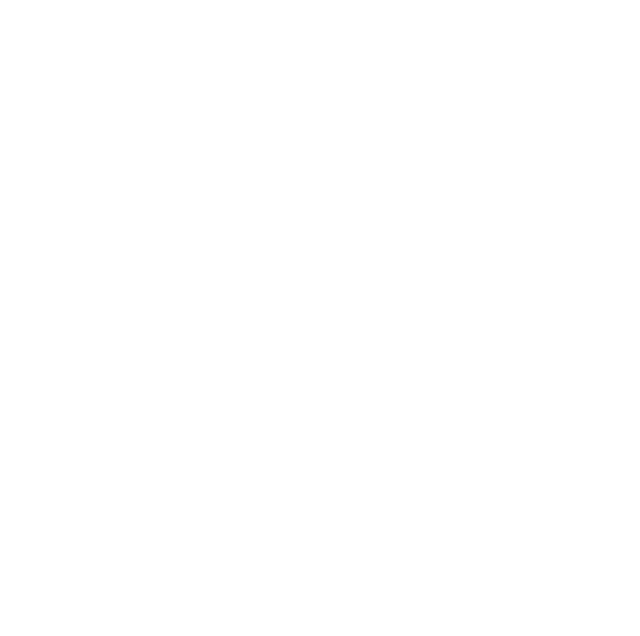

In [280]:
plt.figure(figsize=(8,8))
dec_tree = plot_tree(
    decision_tree = model,
    feature_names = X.columns,
    class_names = y.unique(),
    filled = True,
    precision = 4,
    rounded = True
)

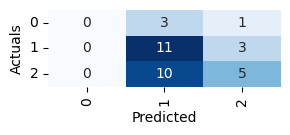

In [183]:
y_predicted = model.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)

plt.figure(figsize=(3,1))
sns.heatmap(cm, annot=True, fmt='d', cmap = 'Blues', cbar=False)
plt.ylabel('Actuals')
plt.xlabel('Predicted')
plt.xticks([0.5,1.5,2.5], ['0', '1', '2'])
plt.yticks([0.5,1.5,2.5], ['0', '1', '2'])
plt.xticks(rotation=90)
plt.yticks(rotation=0);

In [185]:
X = df_short[['Release Year', 'Diatonic Qty', 'Chromatic Qty', 'Complexions Qty']]
y = df_short['McCartney']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

models = (
    ('Logistic', LogisticRegression(solver='lbfgs', max_iter=10000)),
    ('KNN', KNeighborsClassifier()),
    ('DecTree', DecisionTreeClassifier()),
    ('RandomForest', RandomForestClassifier()),
    ('XGB', XGBClassifier())
)

for model_name, model in models:
    model.fit(X_train, y_train)
    print(model_name, model.score(X_test, y_test))

Logistic 0.48484848484848486
KNN 0.48484848484848486
DecTree 0.48484848484848486
RandomForest 0.5454545454545454
XGB 0.5151515151515151


In [186]:
X = df_short[['Release Year', 'Diatonic Qty', 'Chromatic Qty', 'Complexions Qty']]
y = df_short['Lennon']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

models = (
    ('Logistic', LogisticRegression(solver='lbfgs', max_iter=10000)),
    ('KNN', KNeighborsClassifier()),
    ('DecTree', DecisionTreeClassifier()),
    ('RandomForest', RandomForestClassifier()),
    ('XGB', XGBClassifier())
)

for model_name, model in models:
    model.fit(X_train, y_train)
    print(model_name, model.score(X_test, y_test))

Logistic 0.6666666666666666
KNN 0.36363636363636365
DecTree 0.36363636363636365
RandomForest 0.45454545454545453
XGB 0.45454545454545453


In [187]:
X = df_short[['Release Year', 'Diatonic Qty', 'Chromatic Qty', 'Complexions Qty']]
y = df_short['Harrison']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

models = (
    ('Logistic', LogisticRegression(solver='lbfgs', max_iter=10000)),
    ('KNN', KNeighborsClassifier()),
    ('DecTree', DecisionTreeClassifier()),
    ('RandomForest', RandomForestClassifier()),
    ('XGB', XGBClassifier())
)

for model_name, model in models:
    model.fit(X_train, y_train)
    print(model_name, model.score(X_test, y_test))

Logistic 0.8181818181818182
KNN 0.8181818181818182
DecTree 0.6363636363636364
RandomForest 0.7878787878787878
XGB 0.7878787878787878


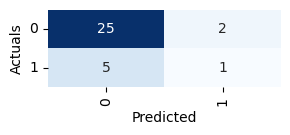

In [188]:
y_predicted = model.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)

plt.figure(figsize=(3,1))
sns.heatmap(cm, annot=True, fmt='d', cmap = 'Blues', cbar=False)
plt.ylabel('Actuals')
plt.xlabel('Predicted')
plt.xticks([0.5,1.5], ['0', '1'])
plt.yticks([0.5,1.5], ['0', '1'])
plt.xticks(rotation=90)
plt.yticks(rotation=0);

/var/folders/j4/48d_zp914zjcvl7wg8l5qsqh0000gn/T/ipykernel_92185/257084015.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.plot(df.groupby('Release Year').sum().index, df.groupby('Release Year').sum()['Harrison'])
/var/folders/j4/48d_zp914zjcvl7wg8l5qsqh0000gn/T/ipykernel_92185/257084015.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.plot(df.groupby('Release Year').sum().index, df.groupby('Release Year').sum()['Harrison'])
/var/folders/j4/48d_zp914zjcvl7wg8l5qsqh0000gn/T/ipykernel_92185/257084015.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In 

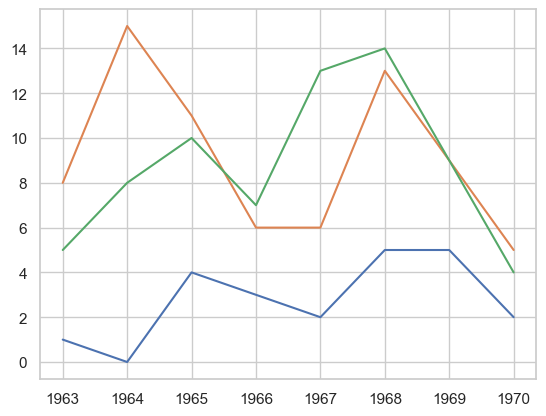

In [221]:
plt.plot(df.groupby('Release Year').sum().index, df.groupby('Release Year').sum()['Harrison'])
plt.plot(df.groupby('Release Year').sum().index, df.groupby('Release Year').sum()['Lennon'])
plt.plot(df.groupby('Release Year').sum().index, df.groupby('Release Year').sum()['McCartney'])

/var/folders/j4/48d_zp914zjcvl7wg8l5qsqh0000gn/T/ipykernel_92185/2154711571.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.plot(df.groupby('Release Year').mean().index, df.groupby('Release Year').mean()['Diatonic Qty'], c='green')
/var/folders/j4/48d_zp914zjcvl7wg8l5qsqh0000gn/T/ipykernel_92185/2154711571.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.plot(df.groupby('Release Year').mean().index, df.groupby('Release Year').mean()['Diatonic Qty'], c='green')
/var/folders/j4/48d_zp914zjcvl7wg8l5qsqh0000gn/T/ipykernel_92185/2154711571.py:2: FutureWarning: The default value of numeric_only in 

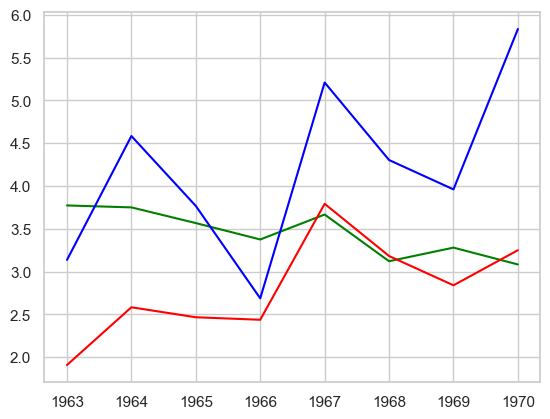

In [229]:
plt.plot(df.groupby('Release Year').mean().index, df.groupby('Release Year').mean()['Diatonic Qty'], c='green')
plt.plot(df.groupby('Release Year').mean().index, df.groupby('Release Year').mean()['Chromatic Qty'], c='blue')
plt.plot(df.groupby('Release Year').mean().index, df.groupby('Release Year').mean()['Complexions Qty'], c='red')

/var/folders/j4/48d_zp914zjcvl7wg8l5qsqh0000gn/T/ipykernel_92185/3366251506.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  years = df.groupby('Release Year').mean().index
/var/folders/j4/48d_zp914zjcvl7wg8l5qsqh0000gn/T/ipykernel_92185/3366251506.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diatonic_avg = df.groupby('Release Year').mean()['Diatonic Qty']
/var/folders/j4/48d_zp914zjcvl7wg8l5qsqh0000gn/T/ipykernel_92185/3366251506.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify nu

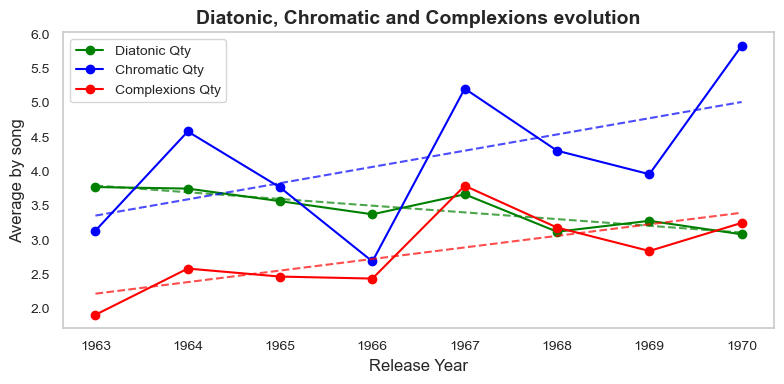

In [289]:
import matplotlib.pyplot as plt
import numpy as np

# Data
years = df.groupby('Release Year').mean().index
diatonic_avg = df.groupby('Release Year').mean()['Diatonic Qty']
chromatic_avg = df.groupby('Release Year').mean()['Chromatic Qty']
complexions_avg = df.groupby('Release Year').mean()['Complexions Qty']

# Function to plot trendline
def plot_trendline(x, y, color):
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x, p(x), linestyle='--', color=color, alpha=0.7)

# Plotting
plt.figure(figsize=(8, 4))  # Set the figure size to smaller dimensions

# Plot data and trendlines
plt.plot(years, diatonic_avg, c='green', label='Diatonic Qty', marker='o')
plot_trendline(years, diatonic_avg, 'green')

plt.plot(years, chromatic_avg, c='blue', label='Chromatic Qty', marker='o')
plot_trendline(years, chromatic_avg, 'blue')

plt.plot(years, complexions_avg, c='red', label='Complexions Qty', marker='o')
plot_trendline(years, complexions_avg, 'red')

# Titles and labels
plt.title('Diatonic, Chromatic and Complexions evolution', fontsize=14, fontweight='bold')
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Average by song', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Legend
plt.legend(loc='upper left', fontsize=10)

# Remove gridlines
plt.grid(False)

# Display the plot
plt.tight_layout()  # Adjusts subplot params for better layout
plt.show()

In [293]:
df_songs_by_key = df_songs.groupby(['Main composer','Key']).count()[['Singer']]
df_songs_by_key.reset_index(inplace=True)
df_songs_by_key['Count']=df_songs_by_key['Singer']
df_songs_by_key.drop('Singer', axis=1, inplace=True)
index_to_drop = df_songs_by_key[df_songs_by_key['Main composer'] == 'Lennon/McCartney/Harrison/Starr'].index
df_songs_by_key.drop(index_to_drop, inplace=True)

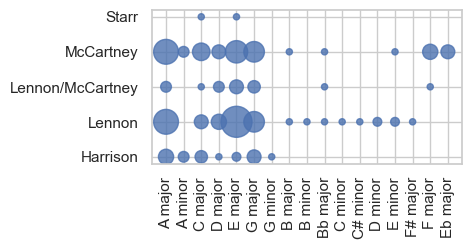

In [294]:
plt.figure(figsize=(4,2))
plt.scatter(df_songs_by_key['Key'], df_songs_by_key['Main composer'], s=df_songs_by_key['Count']*20, alpha=.8)
plt.xticks(rotation=90);